**Soft Margin Classification**

In [ ]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [ ]:
iris = datasets.load_iris()
X = iris["data"][:, (2, 3)] # petal length, petal width
y = (iris["target"] == 2).astype(np.float64) # Iris virginica

svm_clf = Pipeline([
 ("scaler", StandardScaler()),
 ("linear_svc", LinearSVC(C=1, loss="hinge")),
 ])

svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

In [ ]:
svm_clf.predict([[5.5, 1.7]])

array([1.])

**Nonlinear SVM Classification**

In [ ]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
X, y = make_moons(n_samples=100, noise=0.15)

polynomial_svm_clf = Pipeline([
 ("poly_features", PolynomialFeatures(degree=3)),
 ("scaler", StandardScaler()),
 ("svm_clf", LinearSVC(C=10, loss="hinge"))
 ])

polynomial_svm_clf.fit(X, y)

/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge'))])

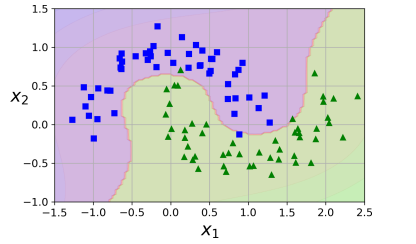



Linear SVM classifier using polynomial features

**Polynomial Kernel**

In [ ]:
from sklearn.svm import SVC

In [ ]:
poly_kernel_svm_clf = Pipeline([
 ("scaler", StandardScaler()),
 ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
 ])

poly_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

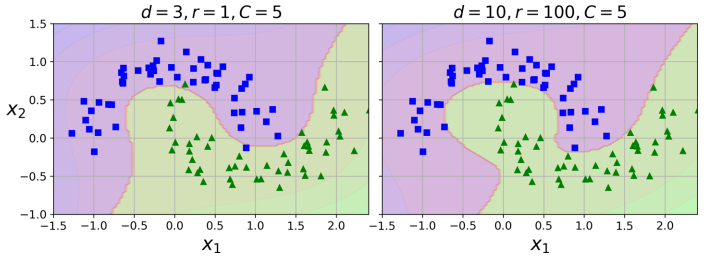


SVM classifiers dengan polynomial kernel

**Gaussian RBF Kernel**

In [ ]:
rbf_kernel_svm_clf = Pipeline([
 ("scaler", StandardScaler()),
 ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
 ])

rbf_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=0.001, gamma=5))])

Jika model Anda overfitting, Anda harus menguranginya; jika underfitting, Anda harus meningkatkannya (mirip dengan hiperparameter C).

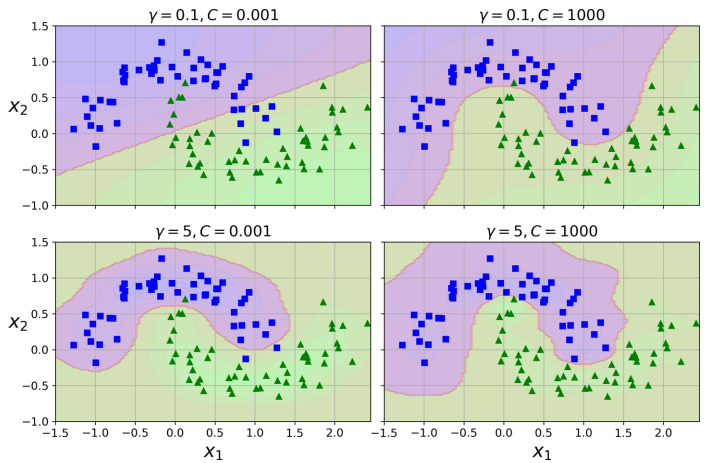

In [ ]:
from sklearn.svm import LinearSVR
svm_reg = LinearSVR(epsilon=1.5)
svm_reg.fit(X, y)

LinearSVR(epsilon=1.5)

Untuk menangani tugas regresi nonlinier, kamu bisa menggunakan model SVM yang dikernelisasi (kernelized SVM).
Gambar 5-11 menunjukkan Regresi SVM pada himpunan data pelatihan acak berbentuk kuadrat, dengan menggunakan kernel polinomial derajat dua.

*   Pada plot sebelah kiri, digunakan sedikit regularisasi (yaitu, nilai C besar).
*   Pada plot sebelah kanan, digunakan lebih banyak regularisasi (yaitu, nilai C kecil).

Gambar 5-11. Regresi SVM menggunakan kernel polinomial derajat kedua


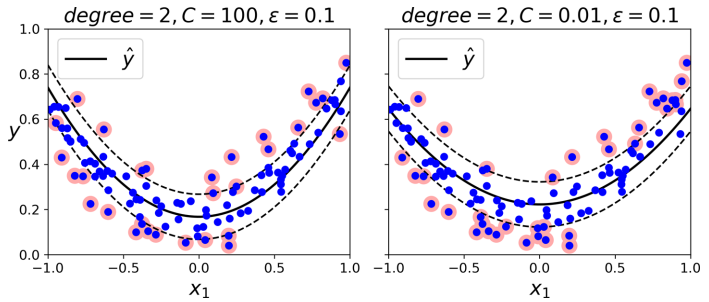

In [ ]:
from sklearn.svm import SVR
svm_poly_reg = SVR(kernel="poly", degree=2, C=100, epsilon=0.1)
svm_poly_reg.fit(X, y)

SVR(C=100, degree=2, kernel='poly')

Kelas SVR merupakan padanan regresi dari kelas SVC, dan kelas LinearSVR merupakan padanan regresi dari kelas LinearSVC. Kelas LinearSVR berskala linier
dengan ukuran set pelatihan (seperti kelas LinearSVC), sedangkan kelas SVR menjadi
terlalu lambat saat set pelatihan bertambah besar (seperti kelas SVC).